<a href="https://colab.research.google.com/github/MeirelesAndre/biblioteca_pandas/blob/main/Case_2_Varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

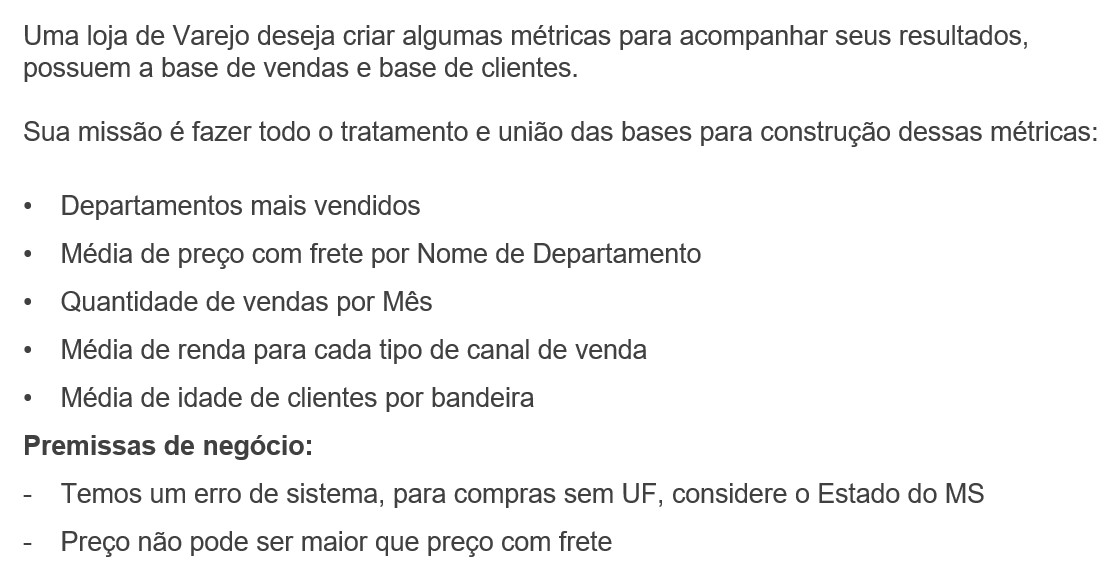

In [58]:
#IMPORTANTO AS BIBLIOTECAS PANDAS E SEABORN
import pandas as pd
import seaborn as sns

In [59]:
#PUXANDO O ARQUIVO DE VAREJO COMO VENDAS
vendas = pd.read_excel('varejo.xlsx')
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [60]:
#VERIDICANDO AS INFORMAÇÕES COMPLETAS
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [61]:
#AGRUPANDO COM CANAL PARA ANALISE
vendas.groupby('idcanalvenda').idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [62]:
#ALTERANDO A CANAL 'APP' PARA 'Aplicativo'
vendas['idcanalvenda'] = vendas['idcanalvenda'].str.replace('APP','Aplicativo')
vendas.groupby('idcanalvenda').idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [63]:
#ALTERANDO OS ESPAÇOS PARA '_' DOS DEPARTAMENTOS
vendas['Nome_Departamento'] = vendas['Nome_Departamento'].str.replace(' ','_')
vendas.groupby('Nome_Departamento').idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

In [64]:
#VERIFICANDO OS DADOS NULOS DA COLUNA ESTADO
vendas[vendas['estado'].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [65]:
#VERIFICANDO A QUANTIDADE DE DADOS NÃO NULOS (REMOVENDO OS NULOS EM UMA VARIÁVEL)
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [66]:
#ALTERANDO OS DADOS NULOS DO ESTADO PARA 'MS'
vendas['estado'].fillna('MS', inplace = True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [67]:
#PEGANDO A MÉDIA DE PREÇO E SUBSTITUINDO PELAS VARIÁVEIS NULAS
media_preco = vendas['Preço'].mean()
vendas['Preço'].fillna(media_preco, inplace = True)

#MOSTRANDO A MÉDIA E CONFERINDO SE OS DADOS FORAM SUBSTITUIDOS(SIM)
print(f' Média de preço = {media_preco}');
vendas.info()

 Média de preço = 906.5891285439033
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [68]:
#VERIICANDO A DESCRIÇÃO DOS PREÇOS
vendas[['Preço','Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [69]:
#VERIFICANDO OS DADOS COM PREÇO ERRADO (NÃO SERÃO USADOS)
preco_errado = vendas.query('Preço > Preço_com_frete')
preco_errado.describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,340.000000,340.000000,340.000000,340.000000
mean,249815.220588,1174.022995,498.043482,14710.300000
std,153574.081196,1304.402489,700.629159,7893.705202
min,1470.000000,60.784000,17.512000,48.000000
25%,117597.500000,906.589129,119.734000,8135.250000
50%,250612.500000,906.589129,279.200000,14427.000000
75%,387031.250000,906.589129,627.200000,21270.750000
max,497920.000000,13598.400000,6799.200000,27969.000000


In [70]:
#PEGANDO APENAS OS DADOS COM PREÇO CERTO
vendas_correto = vendas.query('Preço < Preço_com_frete')
vendas_correto.describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047.000000,22047.000000,22047.000000
mean,253799.955550,549.518401,567.332688,13856.313013
std,144794.628563,846.295127,863.458763,8049.120135
min,25.000000,8.720000,9.512000,1.000000
25%,127670.000000,93.528000,100.800000,6858.000000
50%,257885.000000,183.200000,193.912000,13845.000000
75%,379705.000000,661.680000,676.736000,20801.000000
max,499960.000000,14391.200000,14407.120000,27982.000000


In [71]:
#FILTRANDO DEPARTAMENTO COMO ESPORTE E LAZER NO ESTADO DE SP
vendas_correto.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP' ").describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,168.000000,168.000000,168.00000,168.000000
mean,265130.744048,1070.083095,1098.71319,14368.571429
std,140435.252208,617.138494,620.66244,7890.233136
min,2145.000000,10.896000,16.11200,210.000000
25%,157955.000000,527.200000,545.32000,7717.500000
50%,253702.500000,1108.008000,1136.24800,15281.000000
75%,380616.250000,1599.200000,1618.88400,20538.000000
max,496910.000000,2399.200000,2432.74400,27837.000000


In [72]:
#AGRUPANDO OS DEPARTAMENTO POR QUANTIDADE DE VENDAS
vendas_correto.groupby('Nome_Departamento').idcompra.nunique().sort_values(ascending= False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


In [125]:
#AGRUPANDO OS DEPARTAMENTOS PELA MÉDIA DOS PREÇOS COM FRETE
agg_dept_preco = round(vendas_correto.groupby('Nome_Departamento')['Preço_com_frete'].agg('mean').sort_values(ascending = False).reset_index(),2) #FUNÇÃO ROUND ESTÁ DEFININDO A QUANTIDADE DE CASAS DECIMAIS DO PREÇO
agg_dept_preco

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [121]:
#AGRUPANDO POR DATA
vendas_por_data = vendas_correto.groupby('Data').idcompra.nunique().reset_index()
vendas_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


In [75]:
#CRIANDO A COLUNA MÊS
vendas_correto['mes'] = vendas_correto['Data'].dt.month
vendas_correto.head()

<ipython-input-75-5ad47096dd02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto['mes'] = vendas_correto['Data'].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [76]:
#PUXANDO A PLANILHA DE CLIENTES
cliente = pd.read_excel('/content/cliente_varejo.xlsx')
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [78]:
#VERIFICANDO A DESCRIÇÃO POR IDADE E RENDA
cliente[['idade','renda']].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [80]:
#VERIFICANDO SE HÁ DADOS NULAS (NÃO HÁ)
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [81]:
#CONVERTENDO A COLUNA RENDA PARA TIPO FLOAT
cliente = cliente.astype({'renda':'float'})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [84]:
#FAZENDO UM LEFT JOIN ENTRE A BASE VENDAS E CLIENTE
vendas_cliente = vendas_correto.merge(cliente,how = 'left', on = 'cliente_Log')
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


In [86]:
#AGRUPANDO A MÉDIA DE RENDA POR CANAL DE VENDA
agg_idcanal_renda = round(vendas_cliente.groupby('idcanalvenda')['renda'].agg('mean').sort_values(ascending = False).reset_index(),2)
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [91]:
#AGRUPANDO A MÉDIA DE IDADE DE CLIENTES POR BANDEIRA
agg_idade_bandeira = round(vendas_cliente.groupby('bandeira')['idade'].agg('mean').sort_values(ascending = False).reset_index(),2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


In [92]:
#IMPORTANTO A BIBLIOTECA MATPLOTLIB
import matplotlib.pyplot as plt

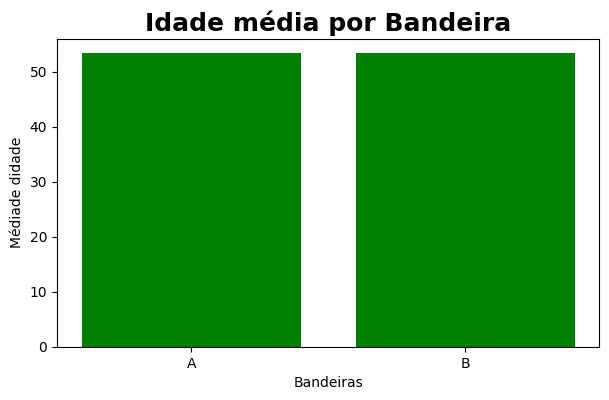

In [96]:
#DEMOSNTANDO A MÉDIA DE IDADE POR BANDEIRA EM UM GRÁFICO DE BARRAS ATRAVÉS DA BIBLIOTECA MATPLOTLIB
fig = plt.figure(figsize=(7,4))

plt.bar(agg_idade_bandeira['bandeira'], agg_idade_bandeira['idade'], color ='green')

plt.ylabel('Médiade didade')

plt.xlabel('Bandeiras')

plt.title('Idade média por Bandeira', loc = 'center', fontsize = 18, fontweight = 'bold', color = 'black');

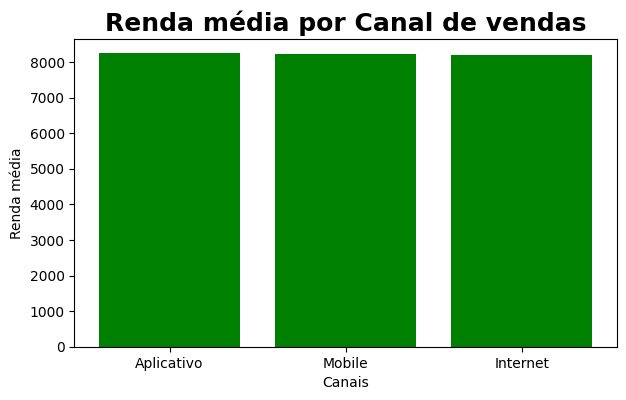

In [108]:
#DEMOSNTANDO A MÉDIA DE RENDA POR CANAL DE VENDA EM UM GRÁFICO DE BARRAS ATRAVÉS DA BIBLIOTECA MATPLOTLIB
fig = plt.figure(figsize=(7,4))

plt.bar(agg_idcanal_renda['idcanalvenda'], agg_idcanal_renda['renda'], color ='green')

plt.ylabel('Renda média')

plt.xlabel('Canais')

plt.title('Renda média por Canal de vendas', loc = 'center', fontsize = 18, fontweight = 'bold', color = 'black');

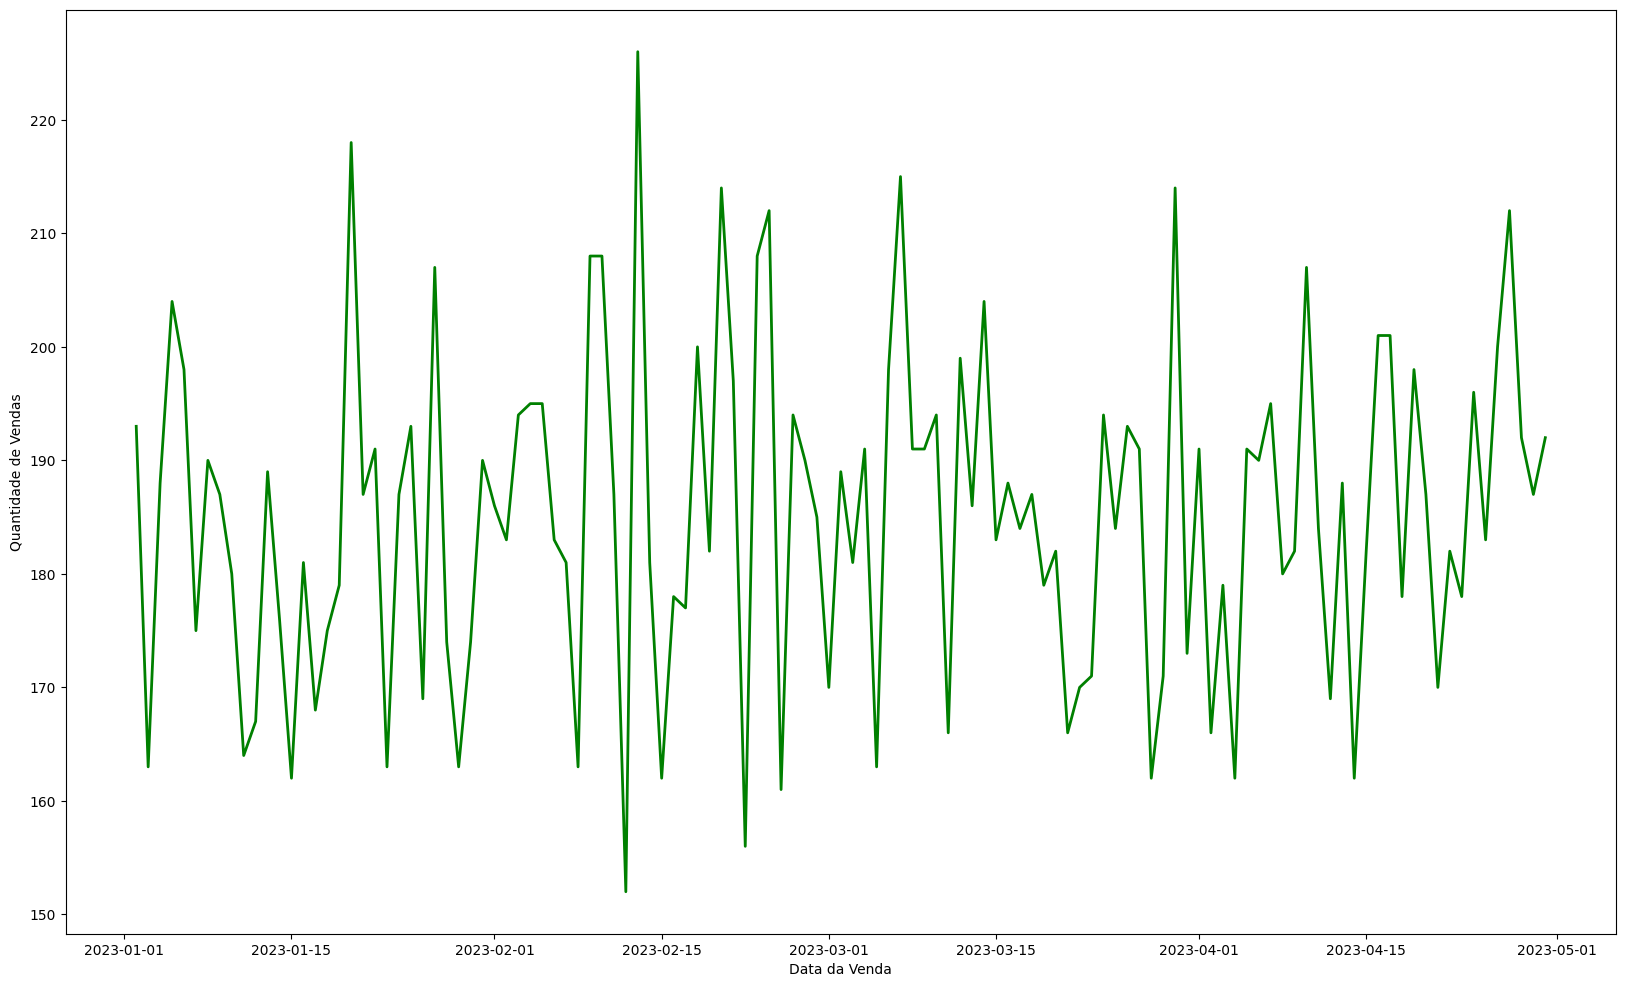

In [124]:
#DEMOSNTANDO A QUANTIDADE DE VENDAS POR DATA EM UM GRÁFICO DE LINHAS ATRAVÉS DA BIBLIOTECA MATPLOTLIB
fig = plt.figure(figsize=(20,12))

plt.xlabel('Data da Venda')
plt.ylabel('Quantidade de Vendas')

x = vendas_por_data['Data']
y = vendas_por_data['idcompra']

plt.plot(x,y, color = 'green', linewidth = '2');
plt.show()

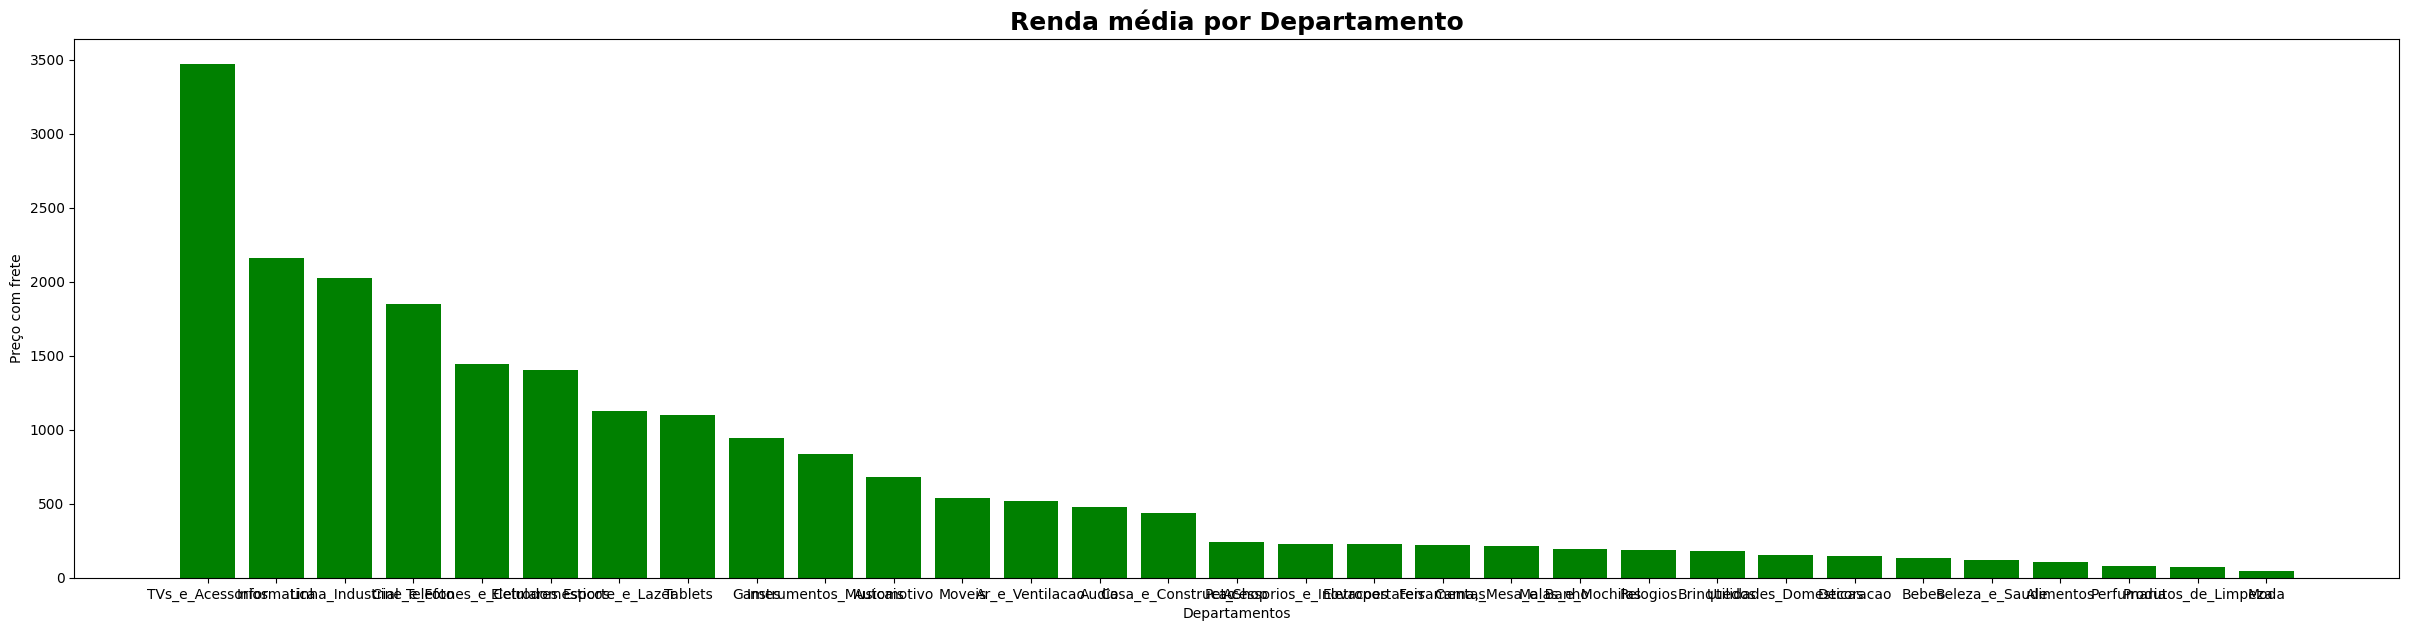

In [135]:
#DEMOSNTANDO A MÉDIA DE RENDA POR CANAL DE VENDA EM UM GRÁFICO DE BARRAS ATRAVÉS DA BIBLIOTECA MATPLOTLIB
fig = plt.figure(figsize=(30,7))

plt.bar(agg_dept_preco['Nome_Departamento'], agg_dept_preco['Preço_com_frete'], color ='green')

plt.ylabel('Preço com frete')

plt.xlabel('Departamentos')

plt.title('Renda média por Departamento', loc = 'center', fontsize = 18, fontweight = 'bold', color = 'black');

In [ ]:
#INSTALANDO O CHART STUDIO
%pip install chart_studio

In [141]:
#IMPORTANDO NOVAS BIBLIOTECAS
import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf
import chart_studio.plotly as py

In [143]:
#DEMOSNTANDO A MÉDIA DE IDADE POR BANDEIRA EM UM GRÁFICO DE BARRAS ATRAVÉS DA BIBLIOTECA PLOTLY
px.bar(agg_idade_bandeira, x = 'bandeira', y = 'idade')

In [149]:
#DEMOSNTANDO A QUANTIDADE DE VENDAS POR DATA EM UM GRÁFICO DE LINHAS ATRAVÉS DA BIBLIOTECA PLOTLY
px.line(vendas_por_data, x = 'Data', y = 'idcompra')

In [151]:
#DEMOSNTANDO A MÉDIA DE RENDA POR CANAL DE VENDA EM UM GRÁFICO DE BARRAS ATRAVÉS DA BIBLIOTECA PLOTLY
px.bar(agg_dept_preco, x = 'Nome_Departamento', y = 'Preço_com_frete')